In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit

In [8]:
# define functions
def LinearFunc(t, a, b):
    return a * t + b

def ChiSqrd(Data, Fit, Error):
    return sum( (Data - Fit)**2 ) / (Error**2)

def RdChiSqrd(Data, Fit, Error, NumPrams):
    return sum( (Data - Fit)**2 ) / (Error**2 * (np.size(Data) - NumPrams - 2))

def GuessFunc(x, a, b, A, h):
    return A*(1 - a*(x - b) / np.sqrt((a*(x - b))**2 + 1)) + h

## Plotting VO2

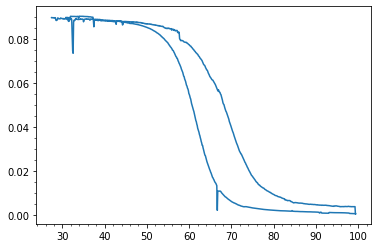

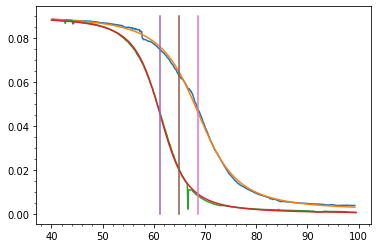

61.27164325871856
68.6725094910053
64.97207637486193
3.700433116143369


In [17]:
# Importing and formatting data
# Reading Files
Data = pd.read_csv("Data/VO2_CSV.CSV")

#Seperating Data
x = pd.DataFrame(Data, columns= ['Col1'])
y = pd.DataFrame(Data, columns= ['Col2'])

#Formatting Data
x = np.resize(x,(1205,1))
y = np.resize(y,(1205,1))

TStartIndex = 106
TCutIndex = 579
TEndIndex = 1116

#Resizing and cutting
xF = x[:,0]
yF = y[:,0]

x1 = x[TStartIndex:TCutIndex,0]
y1 = y[TStartIndex:TCutIndex,0]

x2 = x[(TCutIndex+1):TEndIndex,0]
y2 = y[(TCutIndex+1):TEndIndex,0]

#########
GuessGuess1 = [5, 70, 0.1, 0.001]
Param1, Param_cov1 = curve_fit(GuessFunc, x1, y1, GuessGuess1, maxfev=150000)

GuessGuess2 = [5, 70, 0.1, 0.001]
Param2, Param_cov2 = curve_fit(GuessFunc, x2, y2, GuessGuess2, maxfev=150000)

TLow = Param2[1]
THigh = Param1[1]

TCrit = (TLow + THigh)/2
TCoerLow = TCrit - TLow
TCoerHigh = THigh - TCrit
TCoer = (TCoerLow + TCoerHigh)/2
#########

plt.plot(xF, yF)
plt.minorticks_on()
plt.show()

plt.plot(x1, y1)
plt.plot(x1, GuessFunc(x1, *Param1))
plt.plot(x2, y2)
plt.plot(x2, GuessFunc(x2, *Param2))
plt.plot([TLow, TLow],[0,0.09])
plt.plot([TCrit, TCrit],[0,0.09])
plt.plot([THigh, THigh],[0,0.09])
plt.minorticks_on()
plt.show()


print(TLow)
print(THigh)
print(TCrit)
#print(TCoerLow)
#print(TCoerHigh)
print(TCoer)

## Plotting BaTiO3

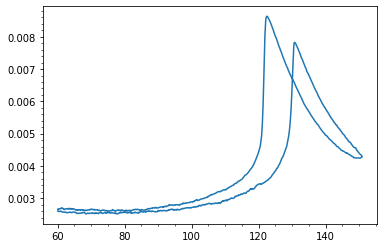

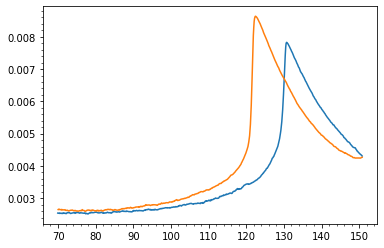

In [34]:
# Importing and formatting data
# Reading Files
Data = pd.read_csv("Data/BaTiO3_CSV.CSV")

#Seperating Data
x = pd.DataFrame(Data, columns= ['Col1'])
y = pd.DataFrame(Data, columns= ['Col4'])

#Formatting Data
x = np.resize(x,(1544,1))
y = np.resize(y,(1544,1))

TStartIndex = 74
TCutIndex = 766
TEndIndex = 1424

#print(np.where(x < 70))
#print(np.where(x == max(x)))

#Resizing and cutting
xF = x[0:1512,0]
yF = y[0:1512,0]

x1 = x[TStartIndex:TCutIndex,0]
y1 = -y[TStartIndex:TCutIndex,0]

x2 = x[(TCutIndex+1):TEndIndex,0]
y2 = -y[(TCutIndex+1):TEndIndex,0]

plt.plot(xF, -yF)
plt.minorticks_on()
plt.show()

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.minorticks_on()
plt.show()